In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### Reading in data

In [53]:
metamap = pd.read_csv("data/metamap_mappings.csv")
metamap["norm_file"] = metamap.file.apply(lambda x: x.split(".")[0])
metamap.head(3)

,file,cui,source,score,matched,preferred,matched_words,semantic_types,is_head,negated,norm_file
0,mtsamples-type-70-sample-110.txt.json,C0370003,SNOMEDCT_US,-645,Specimen,Specimen,['sample'],['sbst'],False,False,mtsamples-type-70-sample-110
1,mtsamples-type-70-sample-110.txt.json,C0332307,SNOMEDCT_US,-645,Type - attribute,Type - attribute,['type'],['qlco'],False,False,mtsamples-type-70-sample-110
2,mtsamples-type-70-sample-110.txt.json,C0037778,SNOMEDCT_US,-861,Medical speciality,Medical Specialities,"['medical', 'specialty']",['bmod'],True,False,mtsamples-type-70-sample-110


In [54]:
ctakes = pd.read_csv("data/ctake_concepts.csv")
ctakes["norm_file"] = ctakes.file.apply(lambda x: x.split(".")[0])
ctakes = ctakes.rename(columns={"{http://www.omg.org/XMI}id": "id"})
ctakes.head(3)

,file,id,codingScheme,code,score,disambiguated,cui,tui,preferredText,norm_file
0,mtsamples-type-70-sample-1650.txt.xmi,8167,SNOMEDCT_US,322837006.0,0.0,False,C0355642,T121,Drugs used in migraine prophylaxis,mtsamples-type-70-sample-1650
1,mtsamples-type-70-sample-1650.txt.xmi,8210,SNOMEDCT_US,255631004.0,0.0,False,C0003232,T195,Antibiotics,mtsamples-type-70-sample-1650
2,mtsamples-type-70-sample-1650.txt.xmi,8901,SNOMEDCT_US,13924000.0,0.0,False,C0043250,T037,Injury wounds,mtsamples-type-70-sample-1650


## Analysis

### Typing Analysis

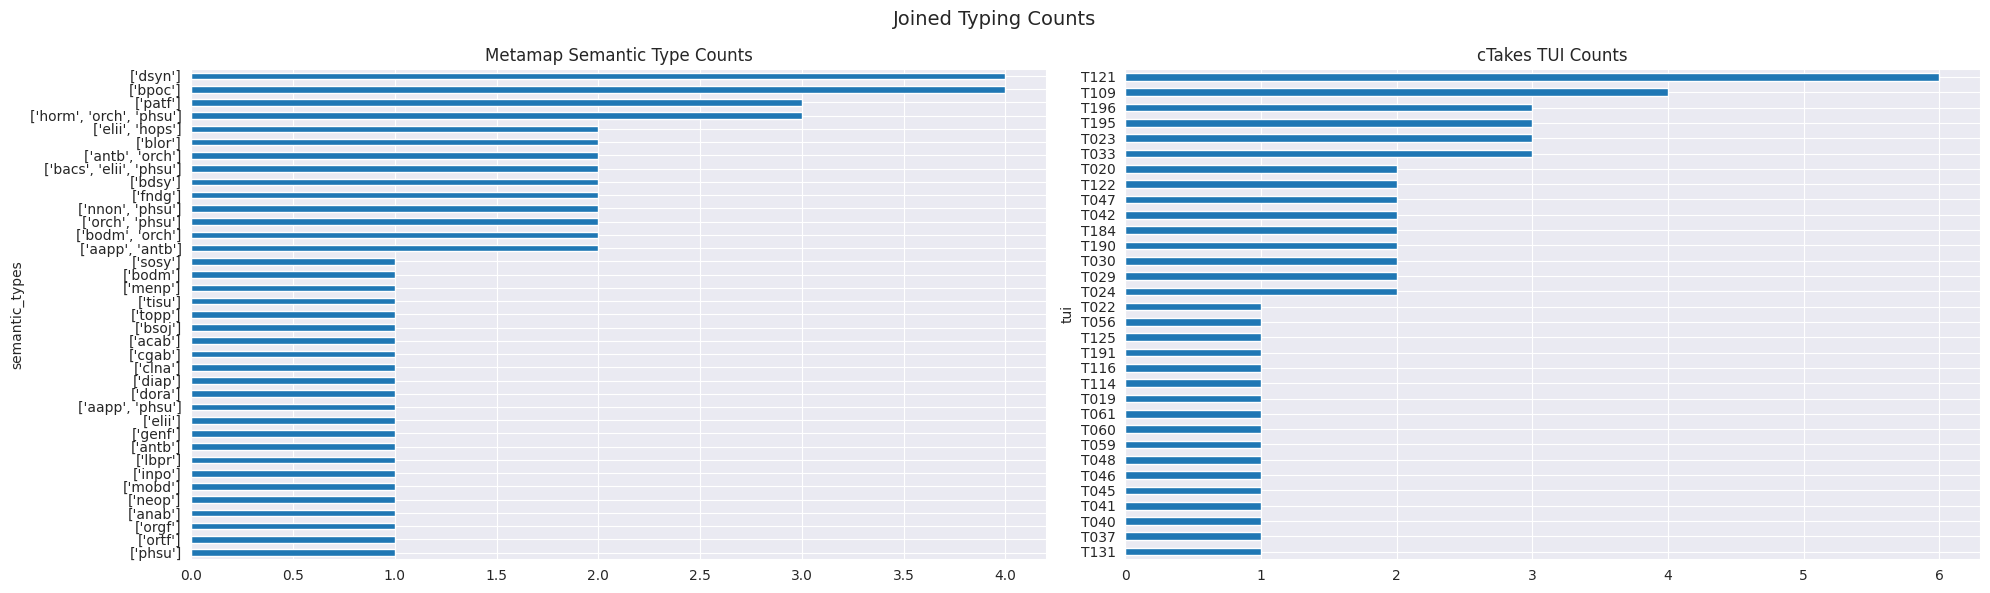

In [127]:
type_config = pd.merge(
    left=ctakes.loc[:, [*merge_cols, "tui"]],
    right=metamap.loc[:, [*merge_cols, "semantic_types"]],
    on=["norm_file", "cui"],
    suffixes=["_ctakes", "_metamap"]
)
tui_to_semantic_types = type_config.loc[:, ["tui", "semantic_types"]].value_counts().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

tui_to_semantic_types.value_counts("semantic_types").sort_values(ascending=True).plot.barh(title="Metamap Semantic Type Counts", ax=ax[0])
tui_to_semantic_types.value_counts("tui").sort_values(ascending=True).plot.barh(title="cTakes TUI Counts", ax=ax[1])

plt.suptitle("Joined Typing Counts", fontsize=14)
plt.tight_layout()


In [133]:
tui_to_semantic_types

,tui,semantic_types,count
0,T061,['topp'],3090
1,T023,['bpoc'],2026
2,T029,['blor'],1314
3,T191,['neop'],593
4,T024,['tisu'],408
5,T037,['inpo'],354
6,T033,['fndg'],290
7,T122,['bodm'],262
8,T046,['patf'],130
9,T047,['dsyn'],125


In [132]:
print("Count of unique TUIs:           %d" % len(tui_to_semantic_types.tui.unique()))
print("Count of unique semantic types: %d" % len(tui_to_semantic_types.semantic_types.unique()))

Count of unique TUIs:           32
Count of unique semantic types: 37


### Comparing CUI

In [55]:
ctakes_cui = set(ctakes.cui.unique())
metamap_cui = set(metamap.cui.unique())

print("There are %d unique CUI in ctakes." % len(ctakes_cui))
print("There are %d unique CUI in metamap." % len(metamap_cui))
print("There are %d unique CUI in both ctakes and metamap." % len(ctakes_cui.intersection(metamap_cui)))
print("There are %d unique ctakes CUI not in metamap." % len(ctakes_cui.difference(metamap_cui)))
print("There are %d unique metamap CUI not in ctakes." % len(metamap_cui.difference(ctakes_cui)))

There are 616 unique CUI in ctakes.
There are 1409 unique CUI in metamap.
There are 420 unique CUI in both ctakes and metamap.
There are 196 unique ctakes CUI not in metamap.
There are 989 unique metamap CUI not in ctakes.


In [56]:
merge_cols = ["norm_file", "cui"]
file_cui_counts = pd.merge(
    left=ctakes.value_counts(merge_cols),
    right=metamap.value_counts(merge_cols),
    on=["norm_file", "cui"],
    suffixes=["_ctakes", "_metamap"]
)
file_cui_counts.head(3)

,,count_ctakes,count_metamap
norm_file,cui,,
mtsamples-type-70-sample-188,C0028429,46,2
mtsamples-type-70-sample-1365,C0018916,42,14
mtsamples-type-70-sample-109,C0037114,24,1


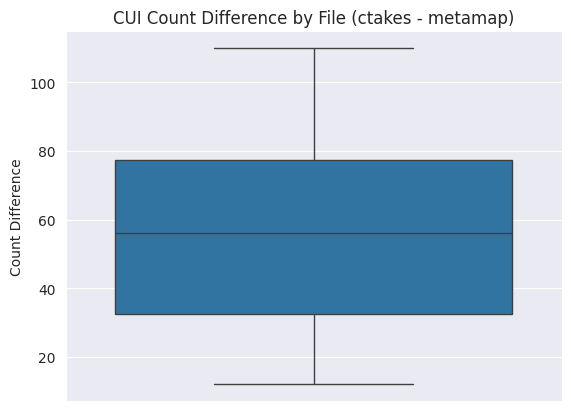

In [73]:
file_cui_counts["ctakes_minus_metamap"] = file_cui_counts.count_ctakes - file_cui_counts.count_metamap

diff_by_file = sns.boxplot(file_cui_counts.groupby("norm_file").ctakes_minus_metamap.sum().sort_values())
diff_by_file.set_title("CUI Count Difference by File (ctakes - metamap)")
diff_by_file.set_ylabel("Count Difference")

plt.show()

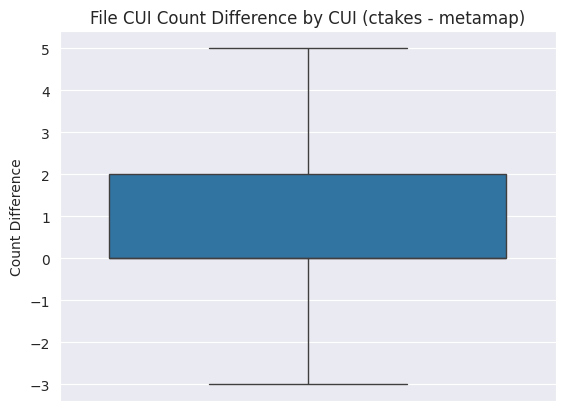

In [74]:
diff_by_file = sns.boxplot(file_cui_counts.groupby("cui").ctakes_minus_metamap.sum().sort_values(), showfliers=False)
diff_by_file.set_title("File CUI Count Difference by CUI (ctakes - metamap)")
diff_by_file.set_ylabel("Count Difference")

plt.show()